# Quantum radiation reaction in head-on laser-electron beam interaction

NJP Open Access [https://iopscience.iop.org/article/10.1088/1367-2630/18/7/073035 ] 

arXiv: 1511.04406 [https://arxiv.org/abs/1511.04406]  

Paper by: Marija _et al_ 



Notebook by: Óscar Amaro

Created: September 2019, Modified: December 2022


In this notebook we reproduce some results from the paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import glob
import h5py
import warnings
import math
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore")

# Fig1: Electron beam with counter-propagating laser (setup)

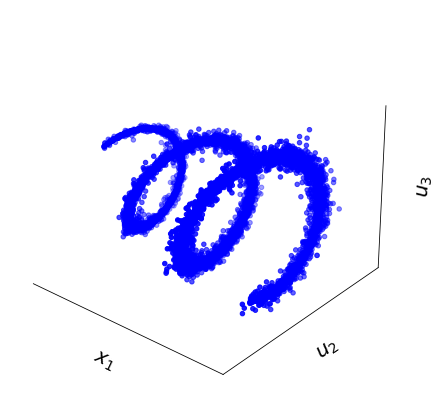

In [2]:
# fig 1

lst = '@data_osiris/parspace_thFA_g1001/S0.14433756729740646A27G1001T0_RAW-electrons-000060.h5'
f = h5py.File(lst,'r')

#q = f['q']
x1 = f['x1']
u2 = f['p2']
u3 = f['p3']

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 10, 6
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, u2, u3, ',', color='blue')
ax.view_init(elev=30., azim=-50.)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$u_2$")
ax.set_zlabel(r"$u_3$")
plt.tight_layout()
plt.show()

# Fig2: electron beam cooling for different laser pulse durations

In [3]:
import scattMC
from scattMC import *
import warnings
warnings.simplefilter("ignore", UserWarning)
import pickle

### E0 = 0.5 GeV

In [6]:
filename='@data_scattMC/scattMC_05GeV'

In [7]:
# load
infile = open(filename,'rb')
w0, a0, dt, trise, tnot, ttotlst, nparts, E0, enefindistlst  = pickle.load(infile) #
infile.close()

In [8]:
# setup
m = 0.5109989461/1000; #[GeV]
w0 = 1.88e15; #[fs-1]
a0 = 27; #[]
E0 = 0.5; #[GeV]
g0 = E0/m; #[]
dt = 0.04*3; #[w0^-1]
trise = 50.0; #[w0^-1]
tnot = trise/20; #[w0^-1]
ttotlst = np.linspace(1,7,7)*50.0; #[w0^-1]
nparts = 3001; # number of sampled particles

In [13]:
enefindistlst = np.zeros((len(ttotlst),nparts));
pltlst = np.zeros(len(ttotlst));

for i in trange(len(ttotlst)):
    # setup
    tflat = ttotlst[i]-trise; #[w0^-1]
    tmax = 2.1*trise+tflat;
    tdim = int(np.floor(tmax/dt));
    lbd = 2*pi; #[c w0^-1]
    
    # initial velocity distribution
    u0dist = sqrt(g0**2-1)*(np.zeros(nparts)+1);
    
    # run
    enefindistlst[i,:] = [evolve(u0,lbd,a0,trise,tflat,tnot,dt,tdim) for u0 in u0dist]

100%|█████████████████████████████████████████| 7/7 [3:03:29<00:00, 1572.72s/it]


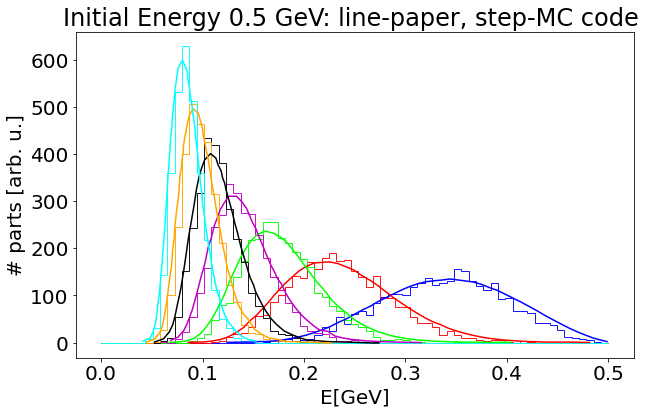

In [9]:
# plot
colorlst = ['b', 'red', 'lime', 'm', 'k', 'orange', 'cyan']

nbins = 70 # number of bins
gedges = np.linspace(0,g0*m,nbins);
for i in range(len(ttotlst)):
    plt.hist(enefindistlst[i,:]*m, gedges, alpha=0.9, histtype='step', color=colorlst[i]);

# get data from the paper
import pandas
import glob
files = glob.glob('@data_paper/fig2a/*.txt')
files.sort()
df = pandas.read_csv(files[-1],header=None)
datax,datay=np.transpose(np.array(df))
maxdatay = max(datay)
for i in range(len(ttotlst)):
    df = pandas.read_csv(files[i],header=None)
    datax,datay=np.transpose(np.array(df))
    plt.plot(datax,datay/maxdatay*420*nparts/3001*100/nbins,'-',color=colorlst[i])

plt.xlabel(r'E[GeV]')
plt.ylabel(r'# parts [arb. u.]')
plt.title('Initial Energy 0.5 GeV: line-paper, step-MC code ')
plt.show()

In [15]:
# save
outfile = open(filename,'wb')
pickle.dump([w0, a0, dt, trise, tnot, ttotlst, nparts, E0, enefindistlst],outfile)
outfile.close()

### E0 = 0.85 GeV

In [10]:
filename='@data_scattMC/scattMC_08GeV'

In [11]:
# load
infile = open(filename,'rb')
w0, a0, dt, trise, tnot, ttotlst, nparts, E0, enefindistlst  = pickle.load(infile) #
infile.close()

In [12]:
# setup
m = 0.5109989461/1000; #[GeV]
w0 = 1.88e15; #[fs-1]
a0 = 27; #[]
E0 = 0.85; #[GeV]
g0 = E0/m; #[]
dt = 0.04*3; #[w0^-1]
trise = 50.0; #[w0^-1]
tnot = trise/20; #[w0^-1]
ttotlst = np.linspace(1,7,7)*50.0; #[w0^-1]
nparts = 3001; # number of sampled particles

In [18]:
enefindistlst = np.zeros((len(ttotlst),nparts));
pltlst = np.zeros(len(ttotlst));

for i in trange(len(ttotlst)):
    # setup
    tflat = ttotlst[i]-trise; #[w0^-1]
    tmax = 2.1*trise+tflat;
    tdim = int(np.floor(tmax/dt));
    lbd = 2*pi; #[c w0^-1]
    
    # initial velocity distribution
    u0dist = sqrt(g0**2-1)*(np.zeros(nparts)+1);
    
    # run
    enefindistlst[i,:] = [evolve(u0,lbd,a0,trise,tflat,tnot,dt,tdim) for u0 in u0dist]

100%|█████████████████████████████████████████| 7/7 [3:02:26<00:00, 1563.83s/it]


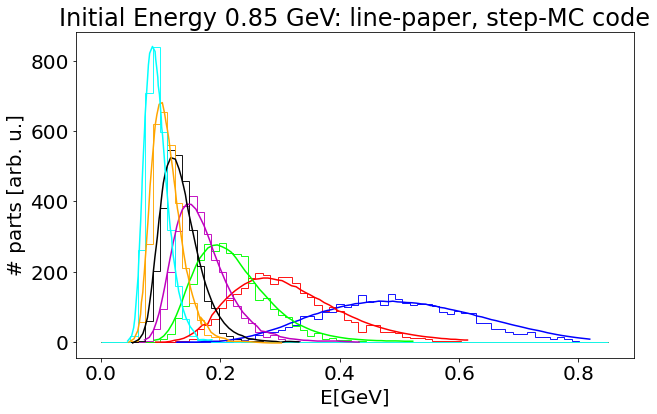

In [13]:
# plot
colorlst = ['b', 'red', 'lime', 'm', 'k', 'orange', 'cyan']

nbins = 70 # number of bins
gedges = np.linspace(0,g0*m,nbins);
for i in range(len(ttotlst)):
    plt.hist(enefindistlst[i,:]*m, gedges, histtype='step', alpha=0.9, color=colorlst[i]);


# get data from the paper
import pandas
import glob
files = glob.glob('@data_paper/fig2b/*.txt')
files.sort()
df = pandas.read_csv(files[-1],header=None)
datax,datay=np.transpose(np.array(df))
maxdatay = max(datay)
for i in range(len(ttotlst)):
    df = pandas.read_csv(files[i],header=None)
    datax,datay=np.transpose(np.array(df))
    plt.plot(datax,datay/maxdatay*420*nparts/3001*1.4*100/nbins,'-',color=colorlst[i])

plt.xlabel(r'E[GeV]')
plt.ylabel(r'# parts [arb. u.]')
plt.title('Initial Energy 0.85 GeV: line-paper, step-MC code')
plt.show()

In [33]:
# save
outfile = open(filename,'wb')
pickle.dump([w0, a0, dt, trise, tnot, ttotlst, nparts, E0, enefindistlst],outfile)
outfile.close()

# Fig3: Evolution of average energy

#### As the electron bunch insteracts with the laser pulse, these particles will emit photons and loose energy.
#### In almost all simulations here presented the number of electrons in the beam is 14464.

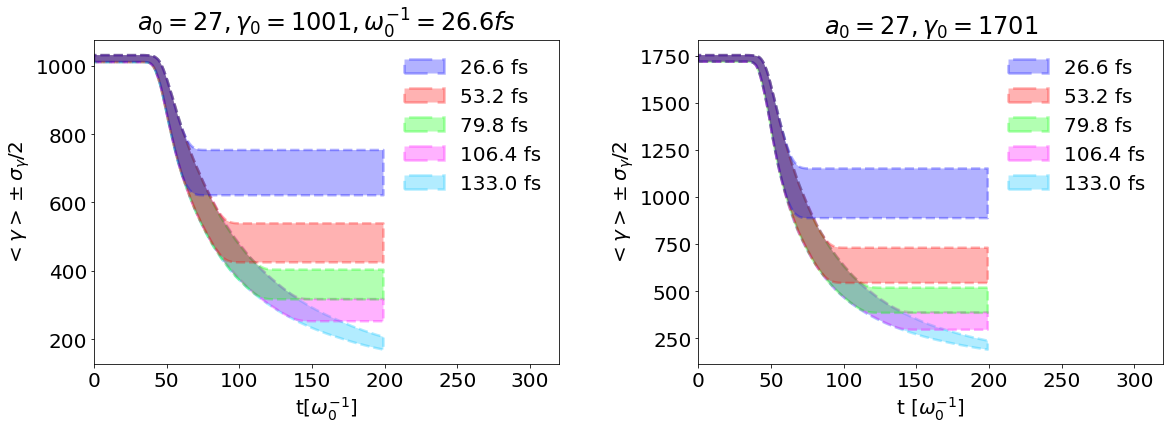

In [15]:
# compare with fig3 a and b from 1511.04406

fig1 = plt.figure(figsize=(22,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1],
         wspace=0.3, hspace=0.5, top=0.95, bottom=0.05, left=0.17, right=0.845) 
# colors from 1511.04406
colors = ['#0000FF',
        '#FF0000',
        '#00FF00',
        '#FF00FF',
        '#00C2FF']

#alpharr=(4*e^2*omega0^2*a0^2)/(3*m*c^3)

dati = glob.glob('@data_osiris/parspace_thFA_g1001/other_sim/pro*.txt')
dati.sort(reverse=True)

plt.rcParams['font.size'] = 20
plt.subplot(gs[0,0])
i=0
for datum in dati:
    data = np.loadtxt(datum)
    tau = (4-i+1)*26.6
    tau = ("{0:.1f}".format(round(tau,2)))
    plt.fill_between(np.transpose(data)[0][:250], (np.transpose(data)[1]+np.transpose(data)[2]/2)[:250], (np.transpose(data)[1]-np.transpose(data)[2]/2)[:250], ls="--",alpha=0.3, color=colors[4-i], linewidth=2.5, label = tau+' fs')
    i+=1
plt.xlabel(r't[$\omega_0^{-1}$]')
plt.ylabel(r'$<\gamma> \pm \sigma_{\gamma}/2$')
plt.xlim([0,320])
plt.title(r'$a_0 = 27, \gamma_0=1001, \omega_0^{-1} = 26.6 fs$')
handles, labels = plt.subplot(gs[0,0]).get_legend_handles_labels()
plt.subplot(gs[0,0]).legend(reversed(handles), reversed(labels), frameon=False)


dati = glob.glob('@data_osiris/parspace_thFA_g1701/pro*.txt')
dati.sort(reverse=True)

plt.rcParams['font.size'] = 20
plt.subplot(gs[0,1])
i=0
for datum in dati:
    data = np.loadtxt(datum)
    tau = (4-i+1)*26.6
    tau = ("{0:.1f}".format(round(tau,2)))
    plt.fill_between(np.transpose(data)[0][:250], (np.transpose(data)[1]+np.transpose(data)[2]/2)[:250], (np.transpose(data)[1]-np.transpose(data)[2]/2)[:250], ls="--",alpha=0.3, color=colors[4-i], linewidth=2.5, label = tau+' fs')
    i+=1
plt.xlabel(r't [$\omega_0^{-1}$]')
plt.ylabel(r'$<\gamma> \pm \sigma_{\gamma}/2$')
plt.xlim([0,320])
plt.title(r'$a_0 = 27, \gamma_0=1701$')
handles, labels = plt.subplot(gs[0,1]).get_legend_handles_labels()
plt.subplot(gs[0,1]).legend(reversed(handles), reversed(labels), frameon=False)

plt.show()

# Evolution of $p_{\bot}$ and conservation of canonical momentum

#### When interacting with the laser pulse, the particles will gain a perpendicular momentum that is close to $a_0$.

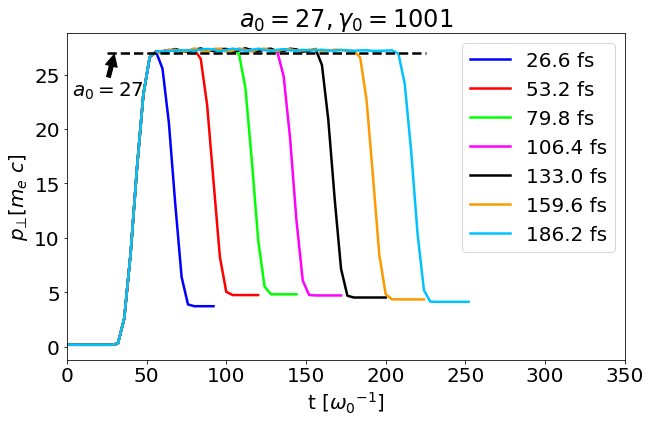

In [16]:
colors = ['#0000FF',
        '#FF0000',
        '#00FF00',
        '#FF00FF',
        '#000000',
        '#FF9900',
        '#00C2FF']

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 10, 6

lsth5 = glob.glob('@data_osiris/parspace_thFA_g1001/pro*.txt')
lsth5.sort()

i=0
for aga5 in lsth5:
    #print(aga5)
    
    data = np.loadtxt(aga5)
    
    tau = (i+1)*26.6
    indx1 = (np.abs(np.transpose(data)[0] - tau-70)).argmin()
    tau=("{0:.1f}".format(round(tau,2)))
    
    plt.plot(np.transpose(data)[0][:indx1], np.transpose(data)[-1][:indx1], ls="-",alpha=1.0, color=colors[i], linewidth=2.5, label=str(tau)+r' fs')
    i+=1
    plt.xlabel(r't [${\omega_0}^{-1}$]')
    plt.ylabel(r'$p_{\bot}[m_e \ c]$')
plt.legend()
plt.plot([25,225],[27,27], ls="--",alpha=1.0, color='k', linewidth=2.5, label=str(tau)+r' fs')
plt.annotate(r'$a_0=27$', xy=(30, 27), xytext=(3, 23),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlim([0,350])
plt.title(r'$a_0 = 27, \gamma_0=1001$')
plt.show()

# Fig7: Evolution of beam divergence

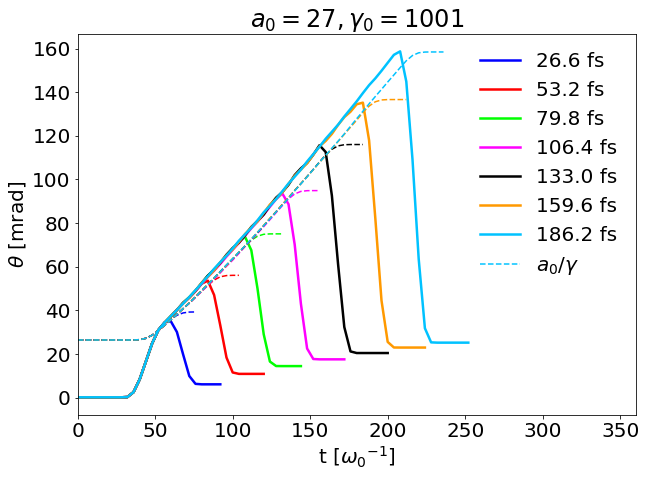

In [17]:
# compare with fig7 a and b from 1511.04406

# colors
colors = ['#0000FF',
        '#FF0000',
        '#00FF00',
        '#FF00FF',
        '#000000',
        '#FF9900',
        '#00C2FF']

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 10, 7

lsth5 = glob.glob('@data_osiris/parspace_thFA_g1001/pro*.txt')
lsth5.sort()

i=0
for aga5 in lsth5:
    
    data = np.loadtxt(aga5)
    
    tau = (i+1)*26.6 # pulse duration in fs
    indx1 = (np.abs(np.transpose(data)[0] - tau-70)).argmin()
    indx2 = (np.abs(np.transpose(data)[0] - tau-55)).argmin()
    
    tau=("{0:.1f}".format(round(tau,2)))
    
    plt.plot(np.transpose(data)[0][:indx1], np.transpose(data)[-2][:indx1]*1000, ls="-",alpha=1.0, color=colors[i], linewidth=2.5, label=str(tau)+r' fs')
    if i==6:
        plt.plot(np.transpose(data)[0][:indx2],27/np.transpose(data)[1][:indx2]*1000,ls="--", color=colors[i], label=r'$a_0/\gamma$')
    else:
        plt.plot(np.transpose(data)[0][:indx2],27/np.transpose(data)[1][:indx2]*1000,ls="--", color=colors[i])
    i+=1
    plt.xlabel(r't [${\omega_0}^{-1}$]')
    plt.ylabel(r'$\theta$ [mrad]')
plt.xlim([0,360])
plt.title(r'$a_0 = 27, \gamma_0=1001$')
plt.legend(frameon=False)
plt.show()

# Fig8: Evolution in momentum space

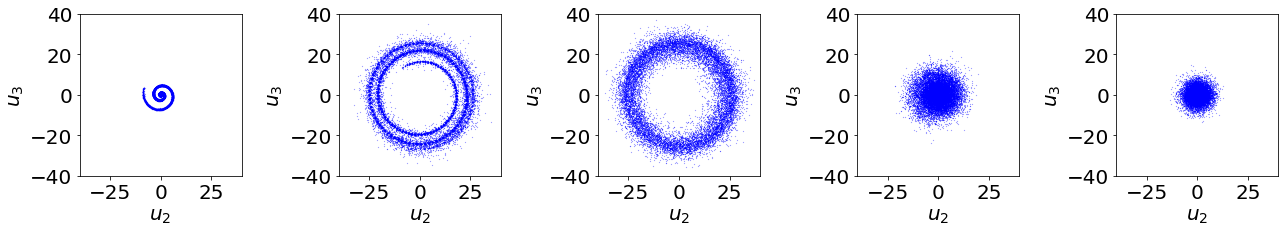

In [18]:
fig1 = plt.figure(figsize=(30,2.5))
gs = gridspec.GridSpec(1, 6, width_ratios=[1,1,1,1,1,1],
         wspace=0.6, hspace=0.8, top=0.95, bottom=0.05, left=0.17, right=0.845) 

lst = glob.glob('@data_osiris/parspace_thFA_g1001/S0.14433756729740646A27G1001T0_RAW-electrons-*.h5')
lst.sort()
i = 0
j = 0
for i in range(len(lst)):
    if i%3==0 and i>6 and i<23:
        #print(lst[i])

        f = h5py.File(lst[i],'r')

        #q = f['q']
        #x1 = f['x1']
        u2 = f['p2']
        u3 = f['p3']
        
        plt.subplot(gs[0,j])
        plt.scatter(u2,u3, 0.1/5, color='blue')
        plt.xlim([-40, +40])
        plt.ylim([-40, +40])
        plt.xlabel(r'$u_2$')
        plt.ylabel(r'$u_3$')
        j+=1

# Dependence on laser pulse duration $\theta_F(\tau_{\mathrm{flat}})$ $\tau_{\mathrm{rise}, \mathrm{fall}}=50\omega_0^{-1}$

For the theoretical model we use  $\theta_F \sim \sqrt{\frac{2}{\pi}} \frac{a_0}{\gamma_F^2} \sigma_F$  from eq. 7 in Phys. Plasmas 26, 053103 (2019) [ doi:10.1063/1.5090992 ].

This model works reasonably well even for $\gamma_F,\sigma_F$ estimated purely from theory. However, if one uses the final average and spread in energy as input values for this $\theta_F$ scaling law, this matches the simulation result almost exactly.

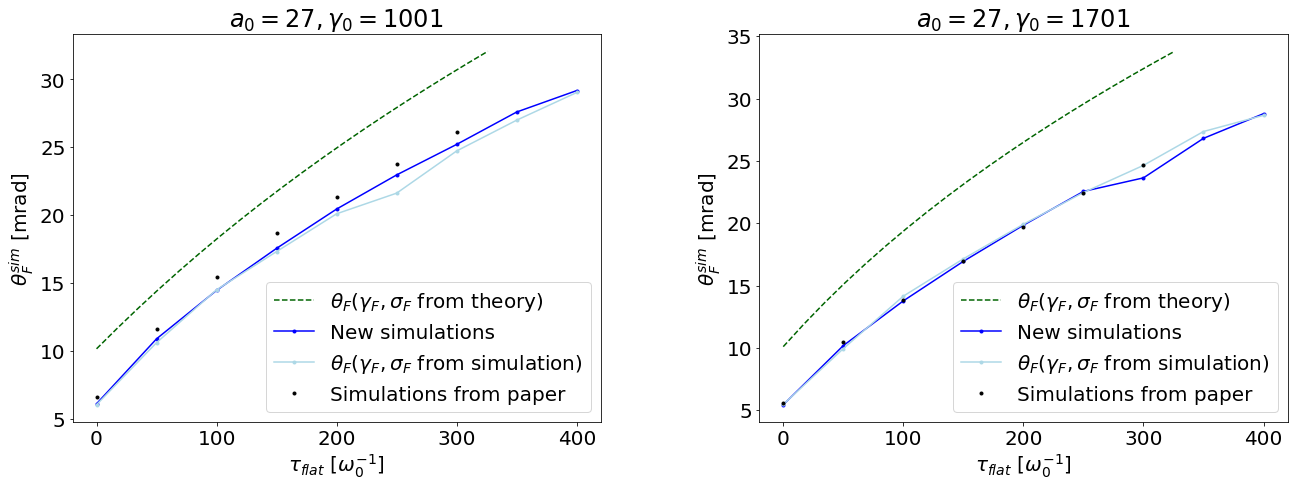

In [42]:
fig1 = plt.figure(figsize=(25,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1],
         wspace=0.3, hspace=0.5, top=0.95, bottom=0.05, left=0.17, right=0.845) 

# expected values
def kapa(tau):
    return 3.2e-5 * I22 *  tau * (1-math.cos(theta))**2
def gF(tau):
    return g0/(1+kapa(tau)*g0)
def sF(tau):
    return math.sqrt( 1.5e-4*math.sqrt(I22)*g0**3/(1+6.1e-5*g0*I22*tau)**3 )
def thF(tau):
    return math.sqrt(2/np.pi)*(a0/gF(tau)**2)*sF(tau)
dim = 20
tau = np.linspace(26.6,200,dim)

# \gamma_0 = 1001
theta = pi
w0 = 1.88e15
c = 299792458
l0 = 2*pi*c/w0*1e6
g0 = 1001
a0 = 27
I22 = 1e-4*(a0/(0.61*l0))**2
thFF = np.zeros(dim)
for i in range(len(tau)):
    thFF[i] = thF(tau[i])

dataView = np.loadtxt('@data_osiris/parspace_thFA_g1001.txt')
dataVranic = np.loadtxt('@data_paper/fig7/g0_1001.txt')
minx = min(np.transpose(dataView)[-2])*1000
maxx = max(np.transpose(dataView)[-2])*1000
diff = maxx-minx

plt.rcParams['font.size'] = 20
plt.subplot(gs[0,0])
plt.plot(tau*50/26.6-50, thFF*1000, '--', color='darkgreen', label=r'$\theta_F(\gamma_F,\sigma_F$ from theory)')
plt.plot(np.transpose(dataView)[0], np.transpose(dataView)[-3]*1000, '.-', color='blue', label=r'New simulations')
plt.plot(np.transpose(dataView)[0], np.transpose(dataView)[-2]*1000, '.-', color='lightblue', label=r'$\theta_F(\gamma_F,\sigma_F$ from simulation)')
plt.plot(np.transpose(dataVranic)[0], np.transpose(dataVranic)[1], '.', color='black', label=r'Simulations from paper')
plt.xlabel(r'${\tau}_{flat} \ [\omega_0^{-1}]$')
plt.ylabel(r'$\theta_F^{sim}$ [mrad]')
#plt.ylim([0,20])
plt.title(r'$a_0 = 27, \gamma_0=1001$')
plt.legend()

# \gamma_0 = 1701
theta = pi
w0 = 1.88e15
c = 299792458
l0 = 2*pi*c/w0*1e6
g0 = 1701
a0 = 27
I22 = 1e-4*(a0/(0.61*l0))**2
thFF = np.zeros(dim)
for i in range(len(tau)):
    thFF[i] = thF(tau[i])
    
dataView = np.loadtxt('@data_osiris/parspace_thFA_g1701.txt')
dataVranic = np.loadtxt('@data_paper/fig7/g0_1701.txt')
minx = min(np.transpose(dataView)[-2])*1000
maxx = max(np.transpose(dataView)[-2])*1000
diff = maxx-minx

plt.rcParams['font.size'] = 20
plt.subplot(gs[0,1])
plt.plot(tau*50/26.6-50, thFF*1000, '--', color='darkgreen', label=r'$\theta_F(\gamma_F,\sigma_F$ from theory)')
plt.plot(np.transpose(dataView)[0], np.transpose(dataView)[-3]*1000, '.-', color='blue', label=r'New simulations')
plt.plot(np.transpose(dataView)[0], np.transpose(dataView)[-2]*1000, '.-', color='lightblue', label=r'$\theta_F(\gamma_F,\sigma_F$ from simulation)')
plt.plot(np.transpose(dataVranic)[0], np.transpose(dataVranic)[1], '.', color='black', label=r'Simulations from paper')
plt.xlabel(r'${\tau}_{flat} \ [\omega_0^{-1}]$')
plt.ylabel(r'$\theta_F^{sim}$ [mrad]')
plt.title(r'$a_0 = 27, \gamma_0=1701$')
plt.legend()
plt.show()